In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation


In [2]:
f = lambda x: x**2 + x + 1
x = np.linspace(-10, 10, 100)
f_grad = lambda x: 2*x

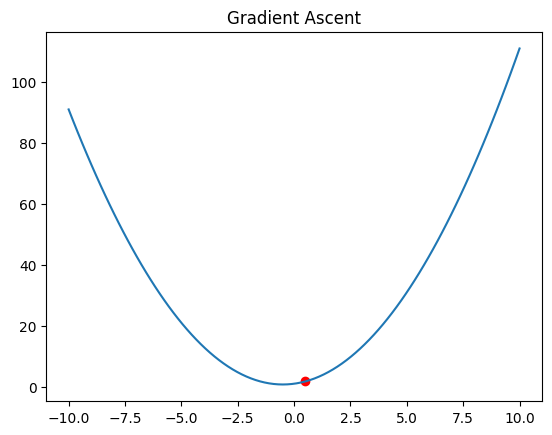

In [3]:
grad_x = [0.5]
for _ in range(5):
    grad_x.append(f_grad(grad_x[-1]))
grad_x = np.array(grad_x)

fig, ax = plt.subplots()

scatter = ax.scatter(grad_x[0], f(grad_x[0]), color='red', label='Gradient Descent')
func = ax.plot(x, f(x), label='f(x)')
ax.set_title('Gradient Ascent')

def update(frame):
    data = np.stack([grad_x[:frame], f(grad_x[:frame])]).T
    scatter.set_offsets(data)
    return scatter

ani = animation.FuncAnimation(fig=fig, func=update, frames=6, interval=2000)
plt.show()
ani.save('gradient_ascent.gif', writer='pillow', fps=1)

In [4]:
def gradient_decent(x0, f_grad, alpha=0.1, n_iter=1000):
    x = x0
    for _ in range(n_iter):
        x -= alpha * f_grad(*x)
    return x

In [5]:
f2 = lambda a, b, c: a + b + c
f_grad2 = lambda a, b, c: np.array([1, 1, 1])
L_grad = lambda a, b, c: 2*(f2(a, b, c) - 2)*f_grad2(a, b, c)
x0 = np.array([3, 6, 1], dtype=float)


In [6]:
x = gradient_decent(x0, L_grad, alpha=0.1, n_iter=100)
print(f2(*x))

2.0
